# Hour 6 & 7: Unveiling Essential Patterns with PCA 🔍

## 1. Introduction to Dimensionality Reduction

In many real-world scenarios, datasets contain a large number of features or dimensions. This high dimensionality can lead to several challenges:

* **Increased Computational Cost:** Training machine learning models on high-dimensional data can be computationally expensive and time-consuming.
* **Overfitting:** High-dimensional data can lead to overfitting, where models memorize noise and perform poorly on unseen data.
* **Difficulty in Visualization:** It's challenging to visualize and understand data in more than three dimensions.

Dimensionality reduction techniques aim to address these challenges by transforming high-dimensional data into a lower-dimensional representation while preserving the most important information.

**Key Goals:**

* **Data Compression:** Reducing the number of dimensions can compress the data, saving storage space and improving computational efficiency.
* **Visualization:** Lower-dimensional data can be easily visualized, allowing for better understanding and pattern recognition.
* **Feature Extraction:** Dimensionality reduction can extract the most informative features, improving the performance of machine learning models.

**Mathematical Context:**

The "curse of dimensionality" refers to the phenomenon where the volume of the space increases so rapidly with the number of dimensions that the available data becomes sparse. In high dimensional spaces, data points become increasingly isolated, making it difficult to find meaningful patterns.

## 2. Principal Component Analysis (PCA): Theory

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that transforms data into a new coordinate system defined by principal components. These principal components are orthogonal (uncorrelated) and capture the maximum variance in the data.

**Mathematical Foundation:**

1.  **Variance and Covariance:**
    * **Variance:** Measures the spread of a single variable. For a variable $X$, the variance is given by:
        * $Var(X) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$, where $\bar{x}$ is the mean of $X$.
    * **Covariance:** Measures the relationship between two variables. For variables $X$ and $Y$, the covariance is given by:
        * $Cov(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$.
    * The covariance matrix of a dataset with $p$ features is a $p \times p$ matrix, where the diagonal elements are the variances and the off-diagonal elements are the covariances.
2.  **Eigenvectors and Eigenvalues:**
    * Eigenvectors are vectors that, when multiplied by a matrix, result in a scaled version of themselves.
    * Eigenvalues are the scaling factors.
    * For a covariance matrix $C$, eigenvectors $v$ and eigenvalues $\lambda$ satisfy:
        * $Cv = \lambda v$.
3.  **PCA Transformation:**
    * PCA finds the eigenvectors and eigenvalues of the covariance matrix of the data.
    * The eigenvectors, sorted by their corresponding eigenvalues, form the principal components.
    * The data is then transformed into the new coordinate system defined by these principal components.

**Steps:**

1.  Standardize the data.
2.  Compute the covariance matrix.
3.  Compute the eigenvectors and eigenvalues of the covariance matrix.
4.  Sort the eigenvectors by their eigenvalues in descending order.
5.  Select the top $k$ eigenvectors (principal components).
6.  Transform the data using the selected principal components.

## 3. PCA Implementation and Interpretation

We will use scikit-learn to implement PCA.




Explained Variance Ratio: [0.72962445 0.22850762 0.03668922 0.00517871]
Cumulative Explained Variance: [0.72962445 0.95813207 0.99482129 1.        ]


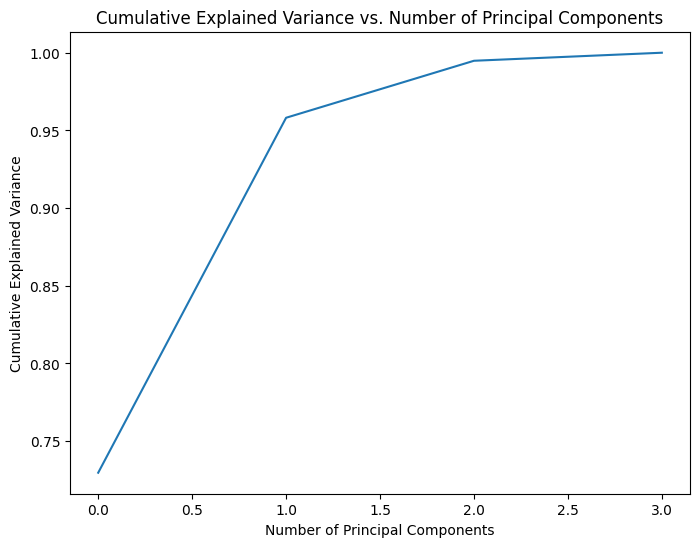

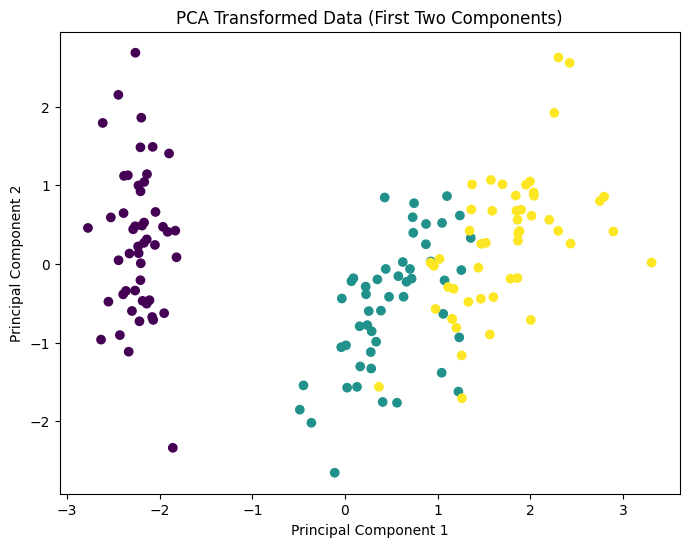

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)
print("Cumulative Explained Variance:", cumulative_explained_variance)

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

# Visualize the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformed Data (First Two Components)')
plt.show()

## 4. PCA Applications and Considerations

**Applications:**

* **Image Compression:** Reducing the number of pixels while preserving image quality.
* **Face Recognition:** Extracting essential features from facial images.
* **Bioinformatics:** Analyzing gene expression data.
* **Finance:** Analyzing stock market data.

**Considerations:**

* **Linearity:** PCA assumes linear relationships between features.
* **Sensitivity to Scaling:** PCA is sensitive to the scaling of the data.
* **Information Loss:** Dimensionality reduction inevitably leads to some information loss.

**Other Dimensionality Reduction Techniques:**

* **t-SNE:** Non-linear dimensionality reduction for visualization.
* **LDA:** Linear discriminant analysis for supervised dimensionality reduction.

## 5. Hands-on Experimentations

1.  Apply PCA to the Wine dataset and visualize the transformed data.
2.  Experiment with different numbers of principal components and observe the impact on explained variance.
3. Selecting Optimal Number of Components


### 1: PCA on the Wine Dataset

Apply PCA to the Wine dataset and visualize the transformed data.

Explained Variance Ratio (Wine): [0.36198848 0.1920749 ]


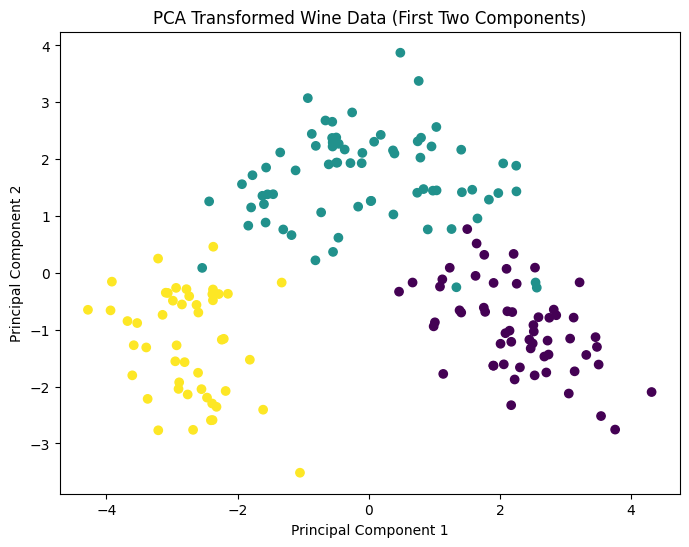

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# Standardize the data
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)

# Apply PCA
pca_wine = PCA(n_components=2) # Reduce to 2 components for visualization
X_wine_pca = pca_wine.fit_transform(X_wine_scaled)

# Explained variance ratio
explained_variance_wine = pca_wine.explained_variance_ratio_
print("Explained Variance Ratio (Wine):", explained_variance_wine)

# Visualize the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], c=y_wine, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformed Wine Data (First Two Components)')
plt.show()

### 2: Experimenting with Number of Components

Experiment with different numbers of principal components and observe the impact on explained variance.

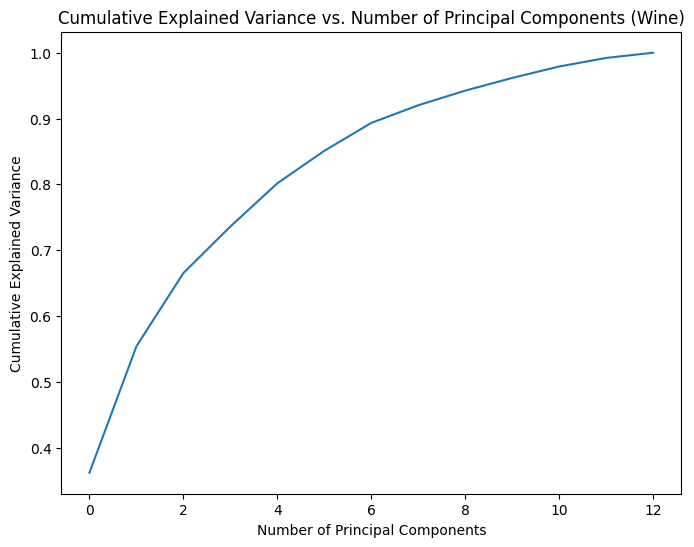

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# Standardize the data
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)

# Apply PCA with all components
pca_wine_all = PCA()
X_wine_pca_all = pca_wine_all.fit_transform(X_wine_scaled)

# Explained variance ratio
explained_variance_wine_all = pca_wine_all.explained_variance_ratio_
cumulative_explained_variance_wine_all = np.cumsum(explained_variance_wine_all)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_explained_variance_wine_all)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components (Wine)')
plt.show()

### 3: Selecting Optimal Number of Components

Based on the cumulative explained variance plot, select an optimal number of principal components and re-apply PCA.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# Standardize the data
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)

# Apply PCA with optimal number of components (e.g., 5 based on the plot)
pca_wine_optimal = PCA(n_components=5)
X_wine_pca_optimal = pca_wine_optimal.fit_transform(X_wine_scaled)

# Explained variance ratio
explained_variance_wine_optimal = pca_wine_optimal.explained_variance_ratio_
cumulative_explained_variance_wine_optimal = np.cumsum(explained_variance_wine_optimal)

print("Explained Variance Ratio (Optimal):", explained_variance_wine_optimal)
print("Cumulative Explained Variance (Optimal):", cumulative_explained_variance_wine_optimal)

Explained Variance Ratio (Optimal): [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294]
Cumulative Explained Variance (Optimal): [0.36198848 0.55406338 0.66529969 0.73598999 0.80162293]


# Second Session: Review the theory and practise Hands-on

### 4: Impact of Scaling on PCA

Apply PCA to the Wine dataset without scaling and compare the results with the scaled version.

Explained Variance Ratio (Unscaled): [0.99809123 0.00173592]


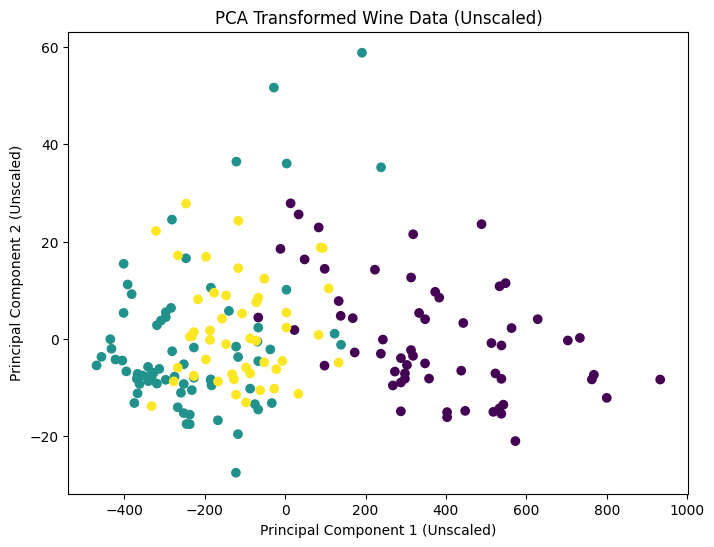

Explained Variance Ratio (Scaled): [0.36198848 0.1920749 ]


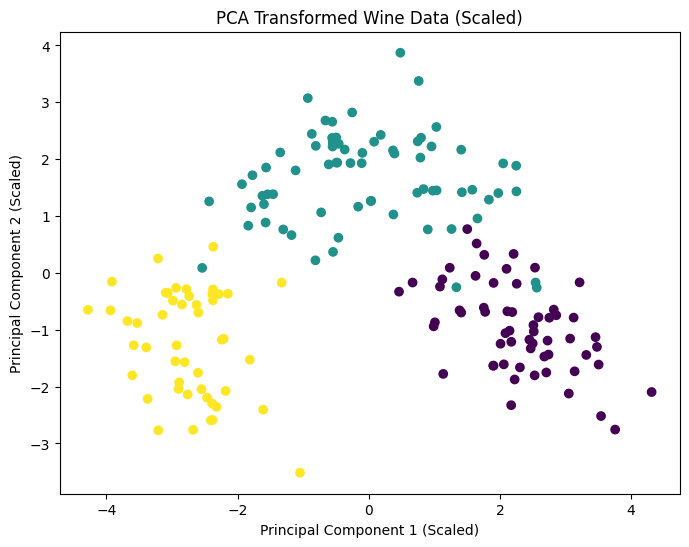

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# Apply PCA without scaling
pca_wine_unscaled = PCA(n_components=2)
X_wine_pca_unscaled = pca_wine_unscaled.fit_transform(X_wine)

# Explained variance ratio (unscaled)
explained_variance_wine_unscaled = pca_wine_unscaled.explained_variance_ratio_
print("Explained Variance Ratio (Unscaled):", explained_variance_wine_unscaled)

# Visualize the transformed data (unscaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_wine_pca_unscaled[:, 0], X_wine_pca_unscaled[:, 1], c=y_wine, cmap='viridis')
plt.xlabel('Principal Component 1 (Unscaled)')
plt.ylabel('Principal Component 2 (Unscaled)')
plt.title('PCA Transformed Wine Data (Unscaled)')
plt.show()

from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)

# Apply PCA with scaling
pca_wine_scaled = PCA(n_components=2)
X_wine_pca_scaled = pca_wine_scaled.fit_transform(X_wine_scaled)

# Explained variance ratio (scaled)
explained_variance_wine_scaled = pca_wine_scaled.explained_variance_ratio_
print("Explained Variance Ratio (Scaled):", explained_variance_wine_scaled)

# Visualize the transformed data (scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_wine_pca_scaled[:, 0], X_wine_pca_scaled[:, 1], c=y_wine, cmap='viridis')
plt.xlabel('Principal Component 1 (Scaled)')
plt.ylabel('Principal Component 2 (Scaled)')
plt.title('PCA Transformed Wine Data (Scaled)')
plt.show()

### The following plot provides a step-by-step overview of applying PCA on the Iris dataset

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

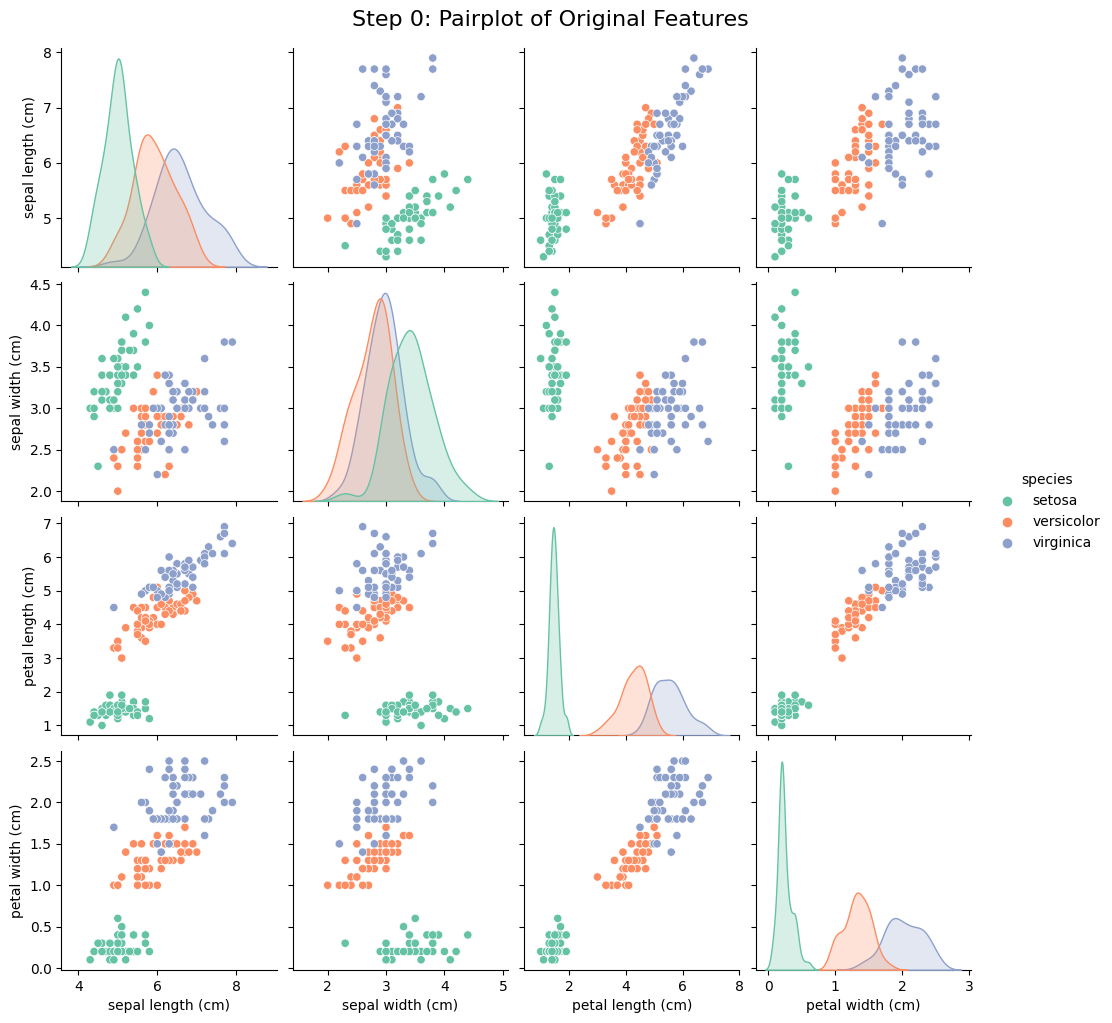

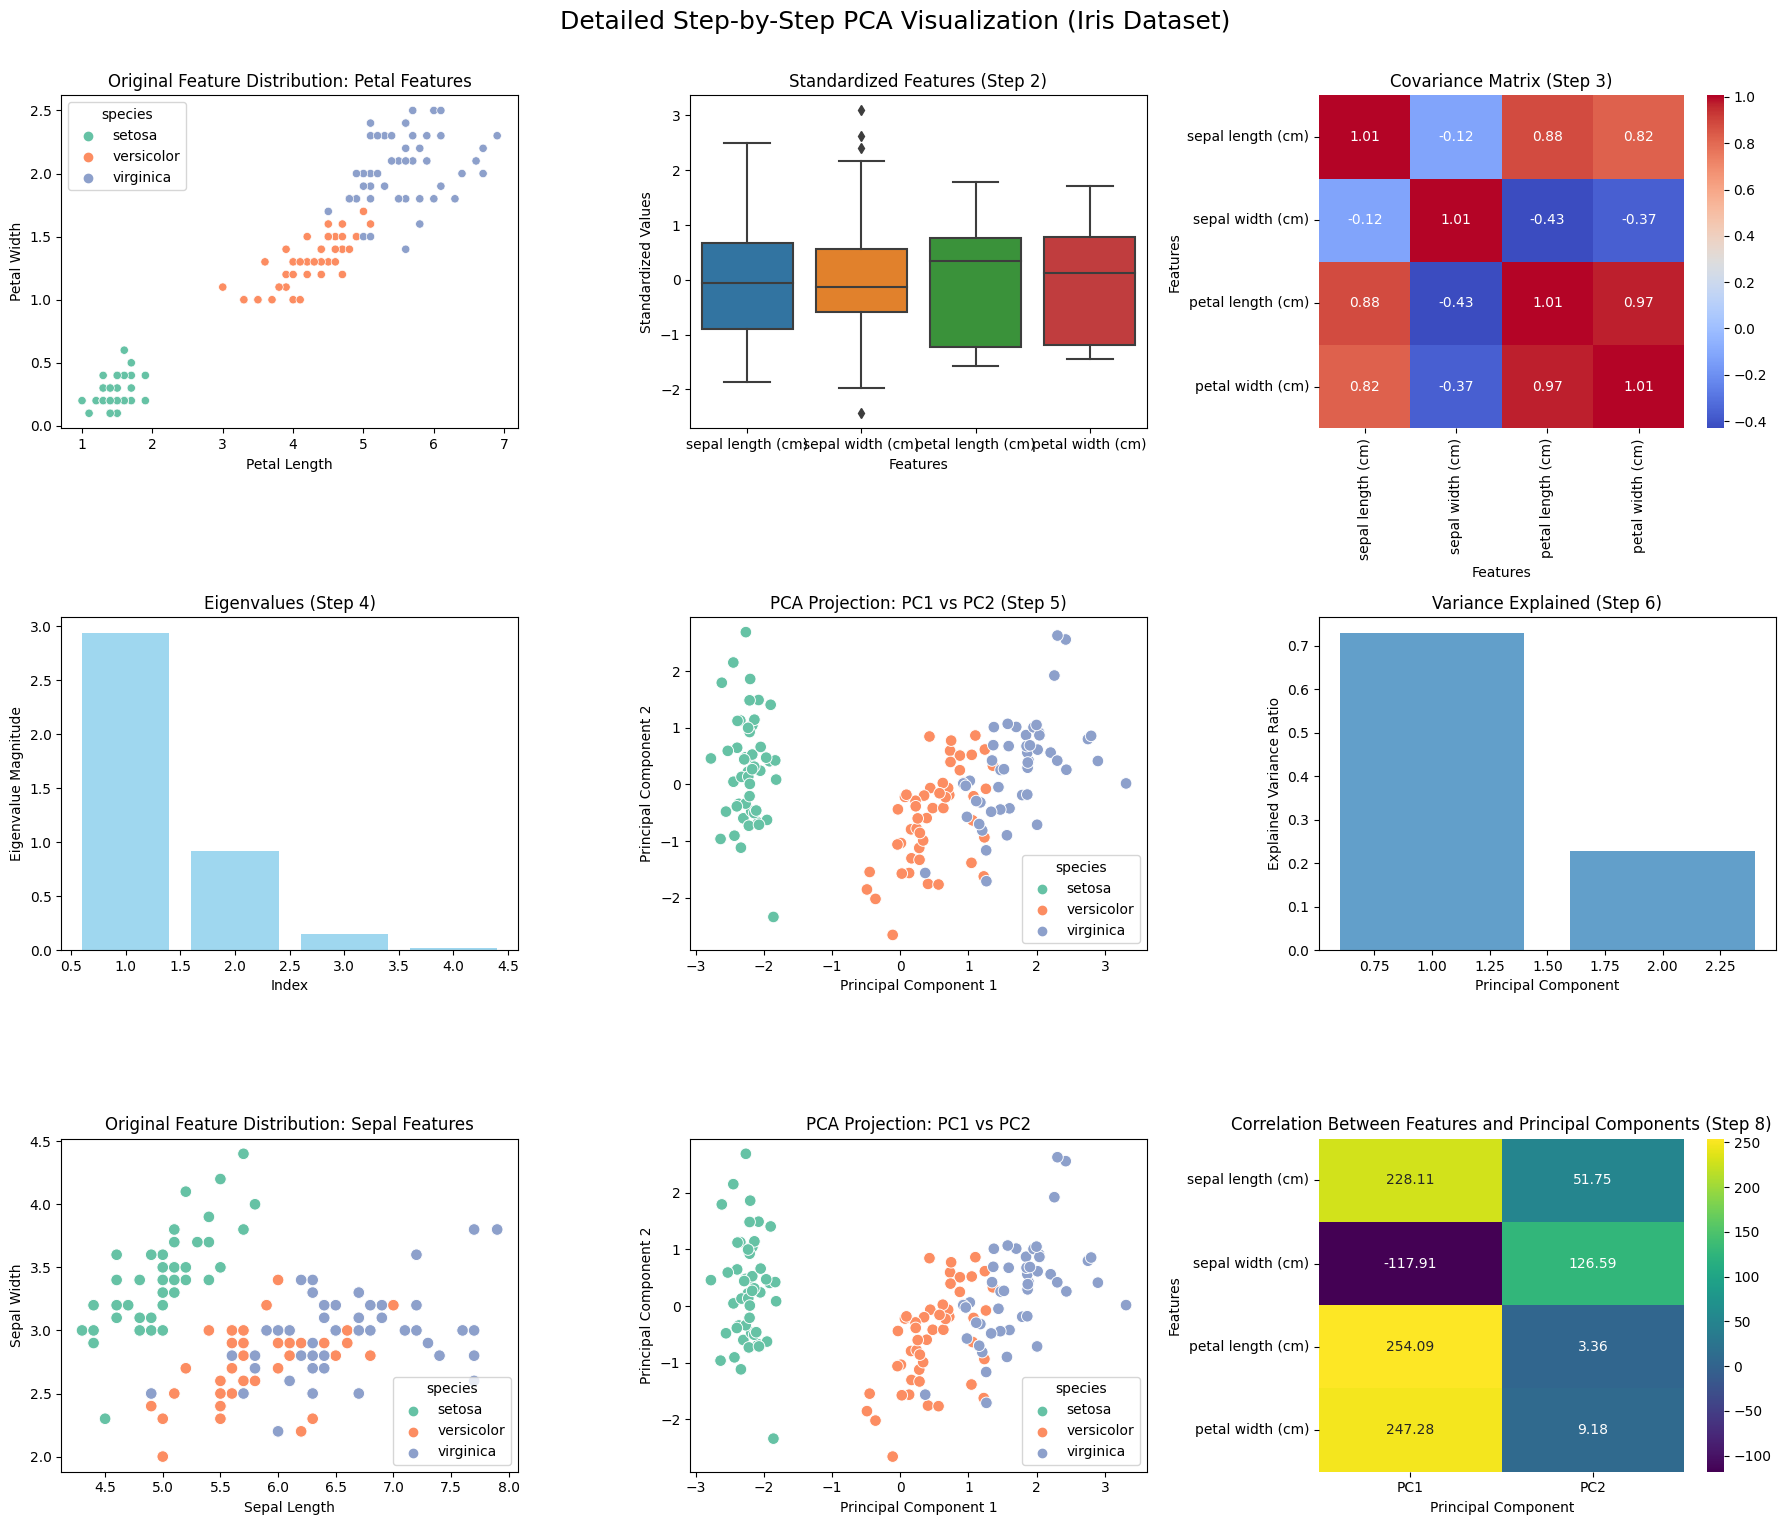

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def visualize_pca_workings_and_save():
    # ---- Load Iris Dataset ----
    iris = load_iris()
    X = iris.data  # Features: Sepal Length, Sepal Width, Petal Length, Petal Width
    y = iris.target  # Classes: Setosa, Versicolor, Virginica
    feature_names = iris.feature_names
    class_names = iris.target_names

    # ---- Step 0: Pairplot (Separate Figure) ----
    df = pd.DataFrame(X, columns=feature_names)
    df['species'] = [class_names[label] for label in y]
    sns.pairplot(df, hue='species', diag_kind="kde", palette="Set2")
    plt.suptitle("Step 0: Pairplot of Original Features", y=1.02, fontsize=16)
    plt.savefig("pairplot_original_features.png")
    plt.show()
    plt.close()

    # ---- Step 1: Inspect Original Feature Relationships ----
    # ---- Create 3x3 Mosaic of Subplots ----
    fig, axes = plt.subplots(3, 3, figsize=(18, 16))
    axes = axes.flatten()

    # Step 1: Original Feature Relationships (Petal Length vs Width)
    sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue="species", palette="Set2", ax=axes[0])
    axes[0].set_title("Original Feature Distribution: Petal Features")
    axes[0].set_xlabel("Petal Length")
    axes[0].set_ylabel("Petal Width")

    # Step 2: Standardized Features vs Raw Features (Boxplot)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    sns.boxplot(data=pd.DataFrame(X_scaled, columns=feature_names), ax=axes[1])
    axes[1].set_title("Standardized Features (Step 2)")
    axes[1].set_xlabel("Features")
    axes[1].set_ylabel("Standardized Values")

    # Step 3: Covariance Matrix Visualization
    covariance_matrix = np.cov(X_scaled.T)
    sns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=feature_names, yticklabels=feature_names, ax=axes[2])
    axes[2].set_title("Covariance Matrix (Step 3)")
    axes[2].set_xlabel("Features")
    axes[2].set_ylabel("Features")

    # Step 4: Eigenvalues and Eigenvectors
    eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
    axes[3].bar(range(1, len(eig_vals)+1), eig_vals, color="skyblue", alpha=0.8)
    axes[3].set_title("Eigenvalues (Step 4)")
    axes[3].set_xlabel("Index")
    axes[3].set_ylabel("Eigenvalue Magnitude")

    # Step 5: Iterative Projection onto Principal Components (PC1 vs PC2)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    explained_variance_ratio = pca.explained_variance_ratio_

    df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
    df_pca['species'] = [class_names[label] for label in y]
    sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="species", palette="Set2", ax=axes[4], s=70)
    axes[4].set_title("PCA Projection: PC1 vs PC2 (Step 5)")
    axes[4].set_xlabel("Principal Component 1")
    axes[4].set_ylabel("Principal Component 2")

    # Step 6: Variance Explained by Principal Components
    axes[5].bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7)
    axes[5].set_title("Variance Explained (Step 6)")
    axes[5].set_xlabel("Principal Component")
    axes[5].set_ylabel("Explained Variance Ratio")

    # Step 7a: Feature Space (Sepal Features)
    sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)", hue="species", palette="Set2", ax=axes[6], s=70)
    axes[6].set_title("Original Feature Distribution: Sepal Features")
    axes[6].set_xlabel("Sepal Length")
    axes[6].set_ylabel("Sepal Width")

    # Step 7b: PCA Projection vs Original (Sepal Features)
    sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="species", palette="Set2", ax=axes[7], s=70)
    axes[7].set_title("PCA Projection: PC1 vs PC2")
    axes[7].set_xlabel("Principal Component 1")
    axes[7].set_ylabel("Principal Component 2")

    # Step 8: Correlation Between Original Features and Principal Components
    correlation_matrix = np.dot(X_scaled.T, X_pca)
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis", xticklabels=["PC1", "PC2"], yticklabels=feature_names, ax=axes[8])
    axes[8].set_title("Correlation Between Features and Principal Components (Step 8)")
    axes[8].set_xlabel("Principal Component")
    axes[8].set_ylabel("Features")

    # Adjust layout for better visualization
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.suptitle("Detailed Step-by-Step PCA Visualization (Iris Dataset)", fontsize=18)

    # Save the complete figure
    plt.savefig("pca_detailed_visualization.png")
    plt.show()
    plt.close()

# Run the function
visualize_pca_workings_and_save()


### 5: PCA for Feature Extraction

Apply PCA to reduce the number of features in the Wine dataset and use the transformed data for a simple classification task.

In [7]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# Standardize the data
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)

# Apply PCA for feature extraction (e.g., 5 components)
pca_wine_feature_extraction = PCA(n_components=5)
X_wine_pca_feature_extraction = pca_wine_feature_extraction.fit_transform(X_wine_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_wine_pca_feature_extraction, y_wine, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with PCA Feature Extraction:", accuracy)

# Compare with the original dataset
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_wine_scaled, y_wine, test_size=0.3, random_state=42)
model_original = LogisticRegression(max_iter=1000)
model_original.fit(X_train_original, y_train_original)
y_pred_original = model_original.predict(X_test_original)
accuracy_original = accuracy_score(y_test_original, y_pred_original)
print("Accuracy with Original Dataset:", accuracy_original)

Accuracy with PCA Feature Extraction: 0.9629629629629629
Accuracy with Original Dataset: 0.9814814814814815


### 6: PCA for Noise Reduction

Apply PCA to the Wine dataset with added noise and observe its ability to reduce noise.

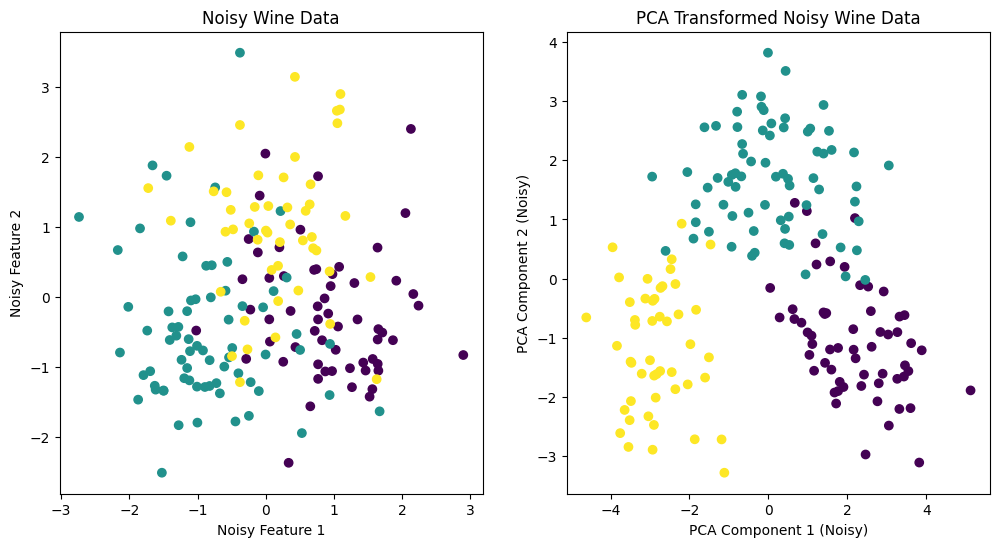

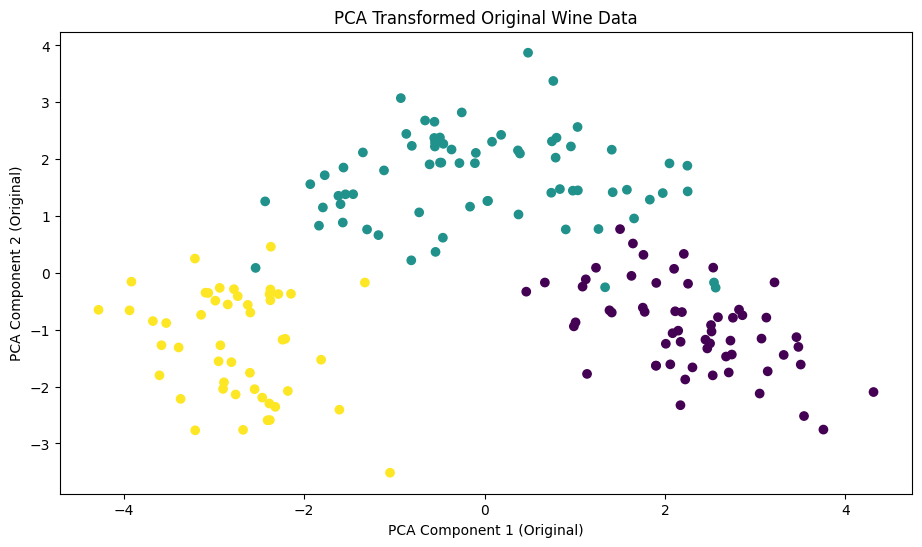

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# Standardize the data
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)

# Add random noise to the data
noise = np.random.normal(0, 0.5, X_wine_scaled.shape)
X_wine_noisy = X_wine_scaled + noise

# Apply PCA to the noisy data
pca_wine_noisy = PCA(n_components=2)
X_wine_pca_noisy = pca_wine_noisy.fit_transform(X_wine_noisy)

# Visualize the noisy data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_wine_noisy[:, 0], X_wine_noisy[:, 1], c=y_wine, cmap='viridis')
plt.xlabel('Noisy Feature 1')
plt.ylabel('Noisy Feature 2')
plt.title('Noisy Wine Data')

# Visualize the PCA transformed noisy data
plt.subplot(1, 2, 2)
plt.scatter(X_wine_pca_noisy[:, 0], X_wine_pca_noisy[:, 1], c=y_wine, cmap='viridis')
plt.xlabel('PCA Component 1 (Noisy)')
plt.ylabel('PCA Component 2 (Noisy)')
plt.title('PCA Transformed Noisy Wine Data')
plt.show()

# Apply PCA to the original (scaled) data
pca_wine_original = PCA(n_components=2)
X_wine_pca_original = pca_wine_original.fit_transform(X_wine_scaled)

# Visualize the original PCA transformed data
plt.figure(figsize=(11, 6))
plt.scatter(X_wine_pca_original[:, 0], X_wine_pca_original[:, 1], c=y_wine, cmap='viridis')
plt.xlabel('PCA Component 1 (Original)')
plt.ylabel('PCA Component 2 (Original)')
plt.title('PCA Transformed Original Wine Data')
plt.show()

### 7: PCA for Data Visualization in 3D

Apply PCA to the Wine dataset, reduce it to 3 components, and visualize the data in 3D.

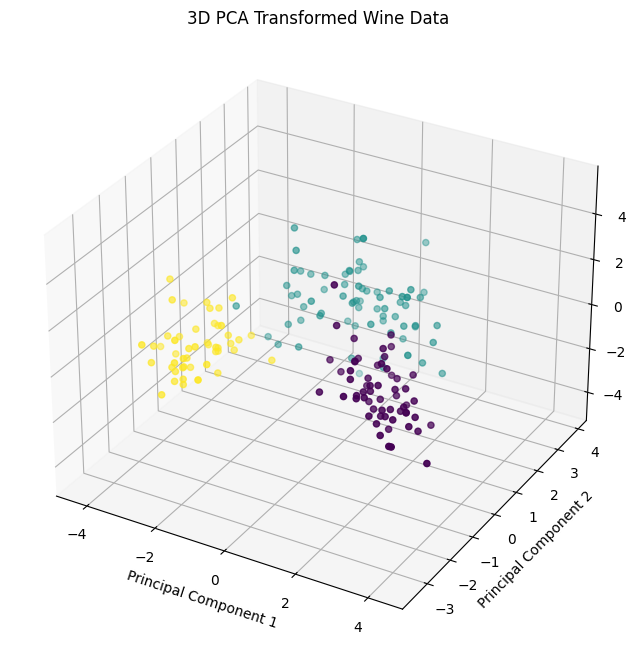

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Load the Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# Standardize the data
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)

# Apply PCA with 3 components
pca_wine_3d = PCA(n_components=3)
X_wine_pca_3d = pca_wine_3d.fit_transform(X_wine_scaled)

# Visualize the 3D transformed data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_wine_pca_3d[:, 0], X_wine_pca_3d[:, 1], X_wine_pca_3d[:, 2], c=y_wine, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Transformed Wine Data')
plt.show()

### 8: PCA for Feature Importance Analysis

Apply PCA to the Wine dataset and analyze the contribution of original features to the principal components.

In [10]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target
feature_names = wine.feature_names

# Standardize the data
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)

# Apply PCA
pca_wine = PCA()
pca_wine.fit(X_wine_scaled)

# Feature contributions to principal components
feature_contributions = pd.DataFrame(pca_wine.components_, columns=feature_names)
print("Feature Contributions to Principal Components:\n", feature_contributions)

Feature Contributions to Principal Components:
      alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0   0.144329   -0.245188 -0.002051          -0.239320   0.141992   
1  -0.483652   -0.224931 -0.316069           0.010591  -0.299634   
2  -0.207383    0.089013  0.626224           0.612080   0.130757   
3  -0.017856    0.536890 -0.214176           0.060859  -0.351797   
4  -0.265664    0.035214 -0.143025           0.066103   0.727049   
5  -0.213539   -0.536814 -0.154475           0.100825  -0.038144   
6  -0.056396    0.420524 -0.149171          -0.286969   0.322883   
7  -0.396139   -0.065827  0.170260          -0.427970   0.156361   
8   0.508619   -0.075283 -0.307694           0.200449   0.271403   
9   0.211605   -0.309080 -0.027125           0.052799   0.067870   
10 -0.225917    0.076486 -0.498691           0.479314   0.071289   
11 -0.266286    0.121696 -0.049622          -0.055743   0.062220   
12  0.014970    0.025964 -0.141218           0.091683   0.056774   


### 9: PCA with Different Scaling Techniques

Apply PCA to the Wine dataset with MinMaxScaler and compare the results with StandardScaler.

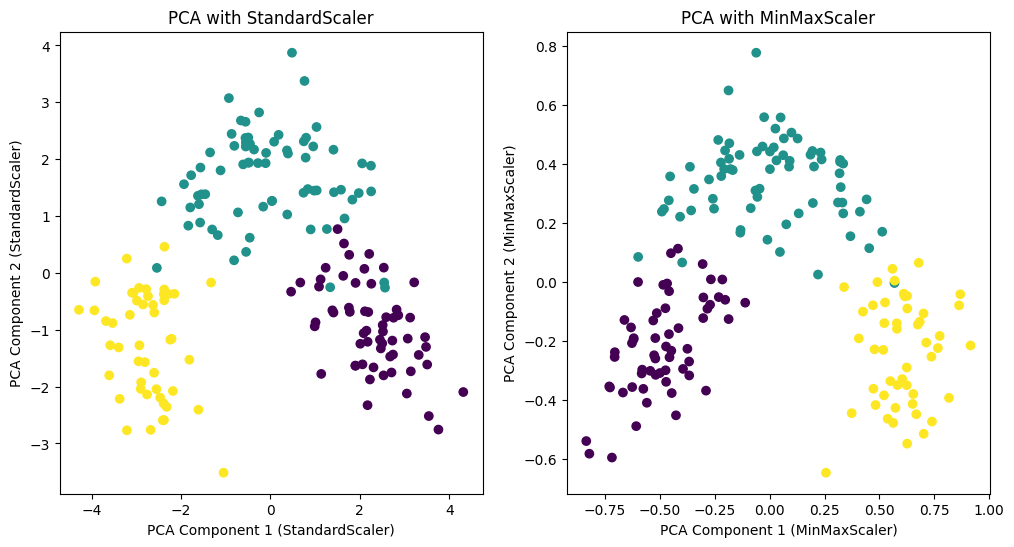

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# Scale the data with StandardScaler
scaler_ss = StandardScaler()
X_wine_ss = scaler_ss.fit_transform(X_wine)

# Apply PCA with StandardScaler
pca_wine_ss = PCA(n_components=2)
X_wine_pca_ss = pca_wine_ss.fit_transform(X_wine_ss)

# Scale the data with MinMaxScaler
scaler_mm = MinMaxScaler()
X_wine_mm = scaler_mm.fit_transform(X_wine)

# Apply PCA with MinMaxScaler
pca_wine_mm = PCA(n_components=2)
X_wine_pca_mm = pca_wine_mm.fit_transform(X_wine_mm)

# Visualize the transformed data (StandardScaler)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_wine_pca_ss[:, 0], X_wine_pca_ss[:, 1], c=y_wine, cmap='viridis')
plt.xlabel('PCA Component 1 (StandardScaler)')
plt.ylabel('PCA Component 2 (StandardScaler)')
plt.title('PCA with StandardScaler')

# Visualize the transformed data (MinMaxScaler)
plt.subplot(1, 2, 2)
plt.scatter(X_wine_pca_mm[:, 0], X_wine_pca_mm[:, 1], c=y_wine, cmap='viridis')
plt.xlabel('PCA Component 1 (MinMaxScaler)')
plt.ylabel('PCA Component 2 (MinMaxScaler)')
plt.title('PCA with MinMaxScaler')
plt.show()

# Apply on a different dataset and try experimenting with different param and hyperparams

### PCA with a Different Dataset (Breast Cancer)

Apply PCA to the Breast Cancer Wisconsin (Diagnostic) dataset and visualize the results.

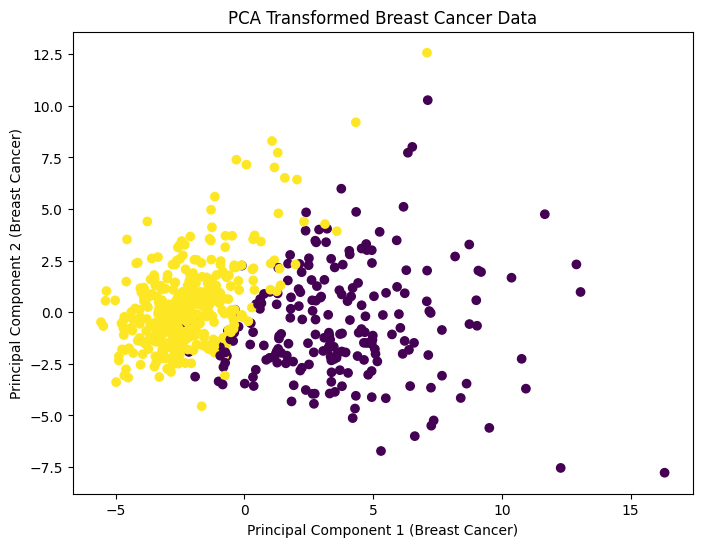

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc = breast_cancer.data
y_bc = breast_cancer.target

# Standardize the data
scaler_bc = StandardScaler()
X_bc_scaled = scaler_bc.fit_transform(X_bc)

# Apply PCA
pca_bc = PCA(n_components=2)
X_bc_pca = pca_bc.fit_transform(X_bc_scaled)

# Visualize the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_bc_pca[:, 0], X_bc_pca[:, 1], c=y_bc, cmap='viridis')
plt.xlabel('Principal Component 1 (Breast Cancer)')
plt.ylabel('Principal Component 2 (Breast Cancer)')
plt.title('PCA Transformed Breast Cancer Data')
plt.show()